# Assignment 2: Working with health data from wearables

## Data

In this assigment you will use the [Daily Sports and Activities](http://archive.ics.uci.edu/ml/datasets/Daily+and+Sports+Activities) dataset from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.html). This dataset contains motion sensor data of 19 daily and sports activities (walking, running, rowing, jumping,...), each performed by 8 subjects in their own style for 5 minutes. Five Xsens MTx units are used on the torso, (right and left) arms, and (right and left) legs. 

----

## Objectives

- Understand time-series health data
- Perform pre-processing and visualisation on time-series data
- Extract features from time-series data
- Train a classifier to predict the activity the users are doing

----

## Exercise 1

Load, analyse and visualise the (temporal) data of the different sensors for subject 7 (p7). Compare walking on a treadmill with a speed of 4 km/h on a flat surface (a10) and running on a treadmill with a speed of 8 km/h (a12). Do you see any difference? Comment.
 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
# Variables 
path = 'data/'

units = ['T', 'RA', 'LA', 'RL', 'LL']
sensors = ['xacc', 'yacc', 'zacc', 'xgyro', 'ygyro', 'zgyro', 'xmag', 'ymag', 'zmag']

# Column names for our dataframe
columns = [f'{unit}_{sensor}' 
           for unit in units 
           for sensor in sensors]

activities = [f'a{i:02}' for i in range(1,20)]
subjects = [f'p{i}' for i in range(1,9)]
segments = [f's{i:02}' for i in range(1,61)]

df = pd.DataFrame(columns=columns+['activity', 'subject', 'segment'])

In [3]:
def read_data (activity, subject, segment): 
    '''Essentially returns the segment table as DataFrame
    '''
    df = pd.read_csv(path+f'{activity}/{subject}/{segment}.txt', names = columns)
    df['activity'] = activity
    df['subject'] = subject
    df['segment'] = segment
    return df

For the required exercise, the target activites are 'a10' and 'a12' for subject 'p7'.

In [4]:
target_activities = ['a10', 'a12']
target_subjects = ['p7']

# We basically concatenate together since we can find the specific activity / subject by querying the columns.
dfs = [read_data(activity, subject, segment)
       for activity in target_activities
       for subject in target_subjects
       for segment in segments]

df = pd.concat(dfs)


In [5]:
df

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,activity,subject,segment
0,9.3105,0.587000,-1.22880,-0.24365,-1.10660,0.037636,-0.72318,0.124560,-0.70206,5.0612,...,-1.56540,-0.407760,0.375060,1.13070,1.02110,0.36735,-0.165180,a10,p7,s01
1,12.0460,-0.086358,0.52566,-0.17974,0.85106,0.270410,-0.72236,0.138810,-0.69857,5.3809,...,-0.94815,-0.036454,0.277830,0.87566,1.04600,0.34339,-0.189730,a10,p7,s01
2,9.2470,-2.045200,10.73400,-1.55140,-0.60079,0.369790,-0.71560,0.165230,-0.70152,4.9954,...,-2.19080,-0.636590,0.428470,0.99528,1.06150,0.33070,-0.197990,a10,p7,s01
3,7.4230,-2.820000,2.47950,-0.80663,0.22937,0.226170,-0.71067,0.194020,-0.70193,4.9443,...,-0.71447,-1.499400,0.358430,0.87873,1.07960,0.32330,-0.185960,a10,p7,s01
4,4.4586,-1.529200,4.25580,0.33046,-0.11867,0.068550,-0.70185,0.201030,-0.70638,5.8938,...,0.22377,-0.307580,0.246650,0.94289,1.09740,0.31584,-0.167440,a10,p7,s01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,-3.1025,5.650300,-3.23360,-1.27080,-1.83460,-0.902960,-0.78864,-0.001589,-0.65606,3.8507,...,4.00150,2.210700,-0.301190,-0.20013,0.89038,0.63903,-0.111490,a12,p7,s60
121,-3.6930,3.843000,-5.84620,-1.75420,-2.79180,-1.642100,-0.84638,-0.002098,-0.57030,3.9235,...,-9.80130,1.081400,3.651500,-1.24390,0.90530,0.61314,-0.060199,a12,p7,s60
122,14.6930,5.904600,-17.40700,2.96150,-1.21430,1.231600,-0.95927,0.023008,-0.39422,5.5976,...,-2.32150,-1.413400,-0.061114,1.38910,0.90174,0.62971,-0.011861,a12,p7,s60
123,66.6420,14.747000,75.97500,3.92580,0.59224,-0.688100,-0.97238,-0.032524,-0.44721,3.4161,...,5.86900,-0.670240,-1.390700,5.76130,1.00840,0.50869,0.019592,a12,p7,s60


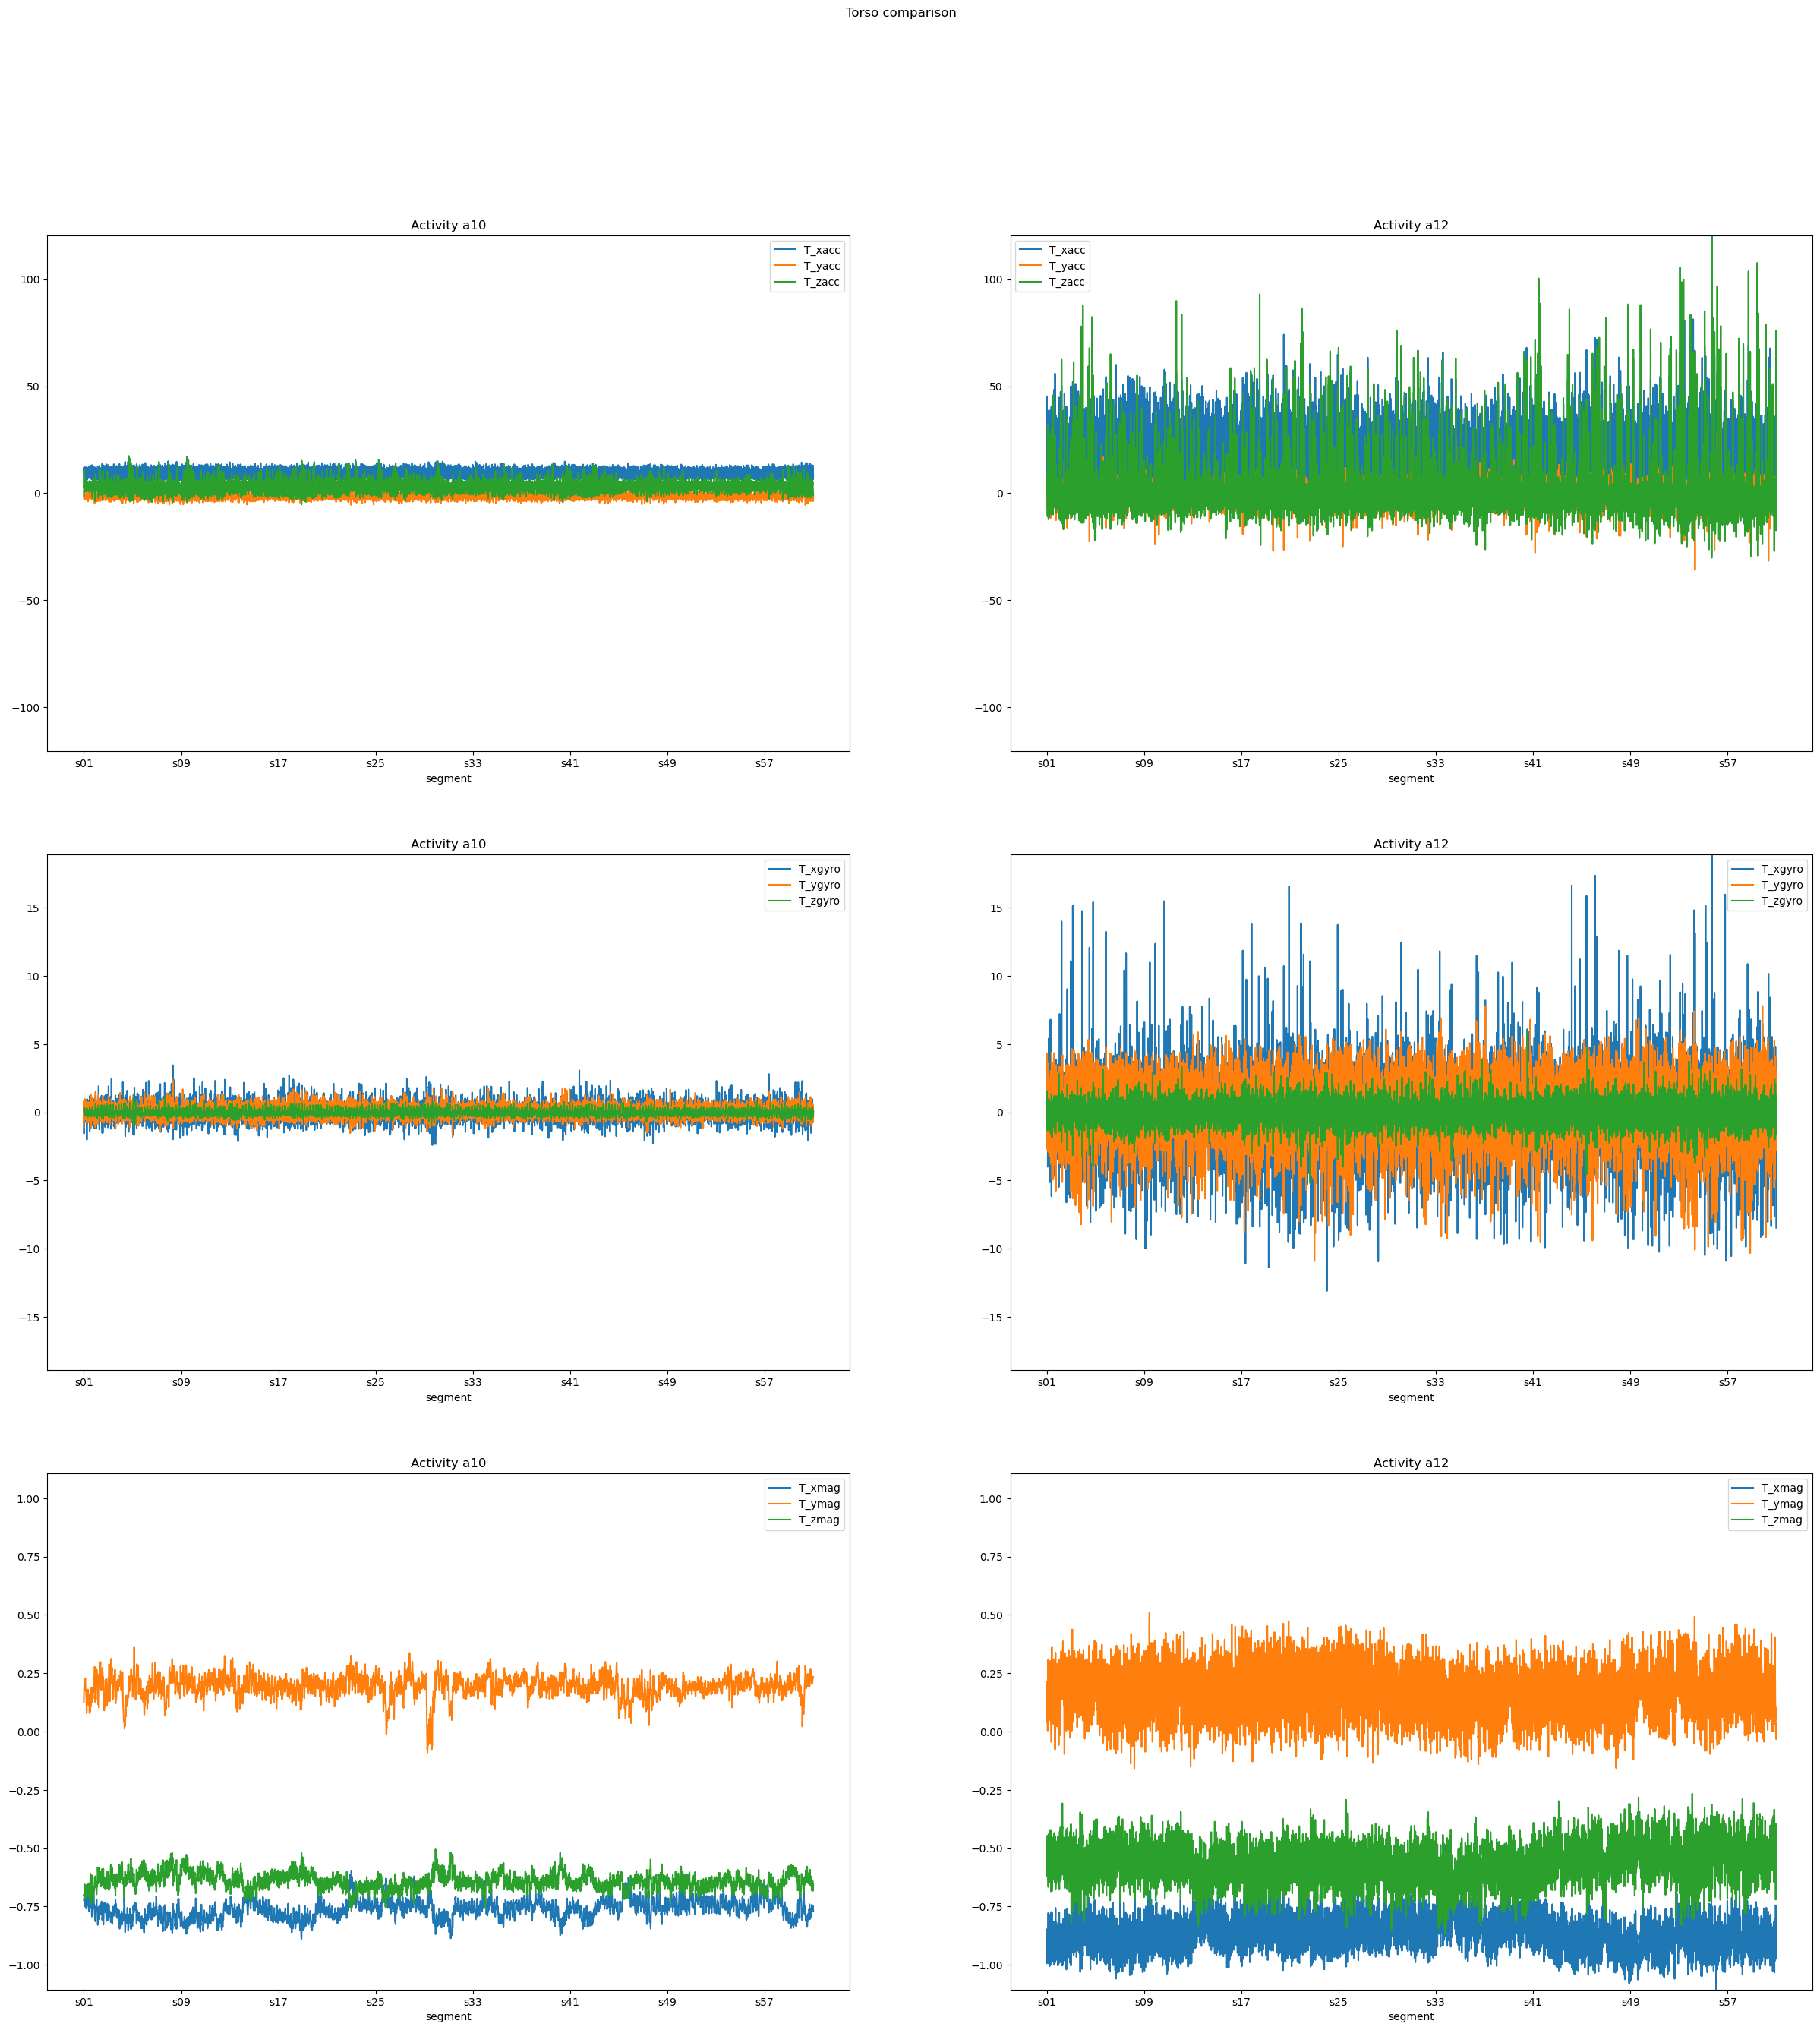

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(30, 30))

# Torso comparison
# We want columns 1 to 9
k = 0  # This auxiliar value will be used on the other plots for the correct plotting of the corresponding col
for i in range(3):
    for j in range (2):
        df.query(f'activity == @target_activities[{j}]').plot(x='segment', y=columns[3*i:3*i+3], ax=axs[i,j])
        lim = df.iloc[:, 3*i:3*i+3].abs().values.max()
        axs[i,j].set_title(f'Activity {target_activities[j]}')
        axs[i,j].set_ylim([-lim,lim])

plt.suptitle('Torso comparison')
plt.show()


All the sensors for the Torso have much more variance for activity 12 than activity 10.

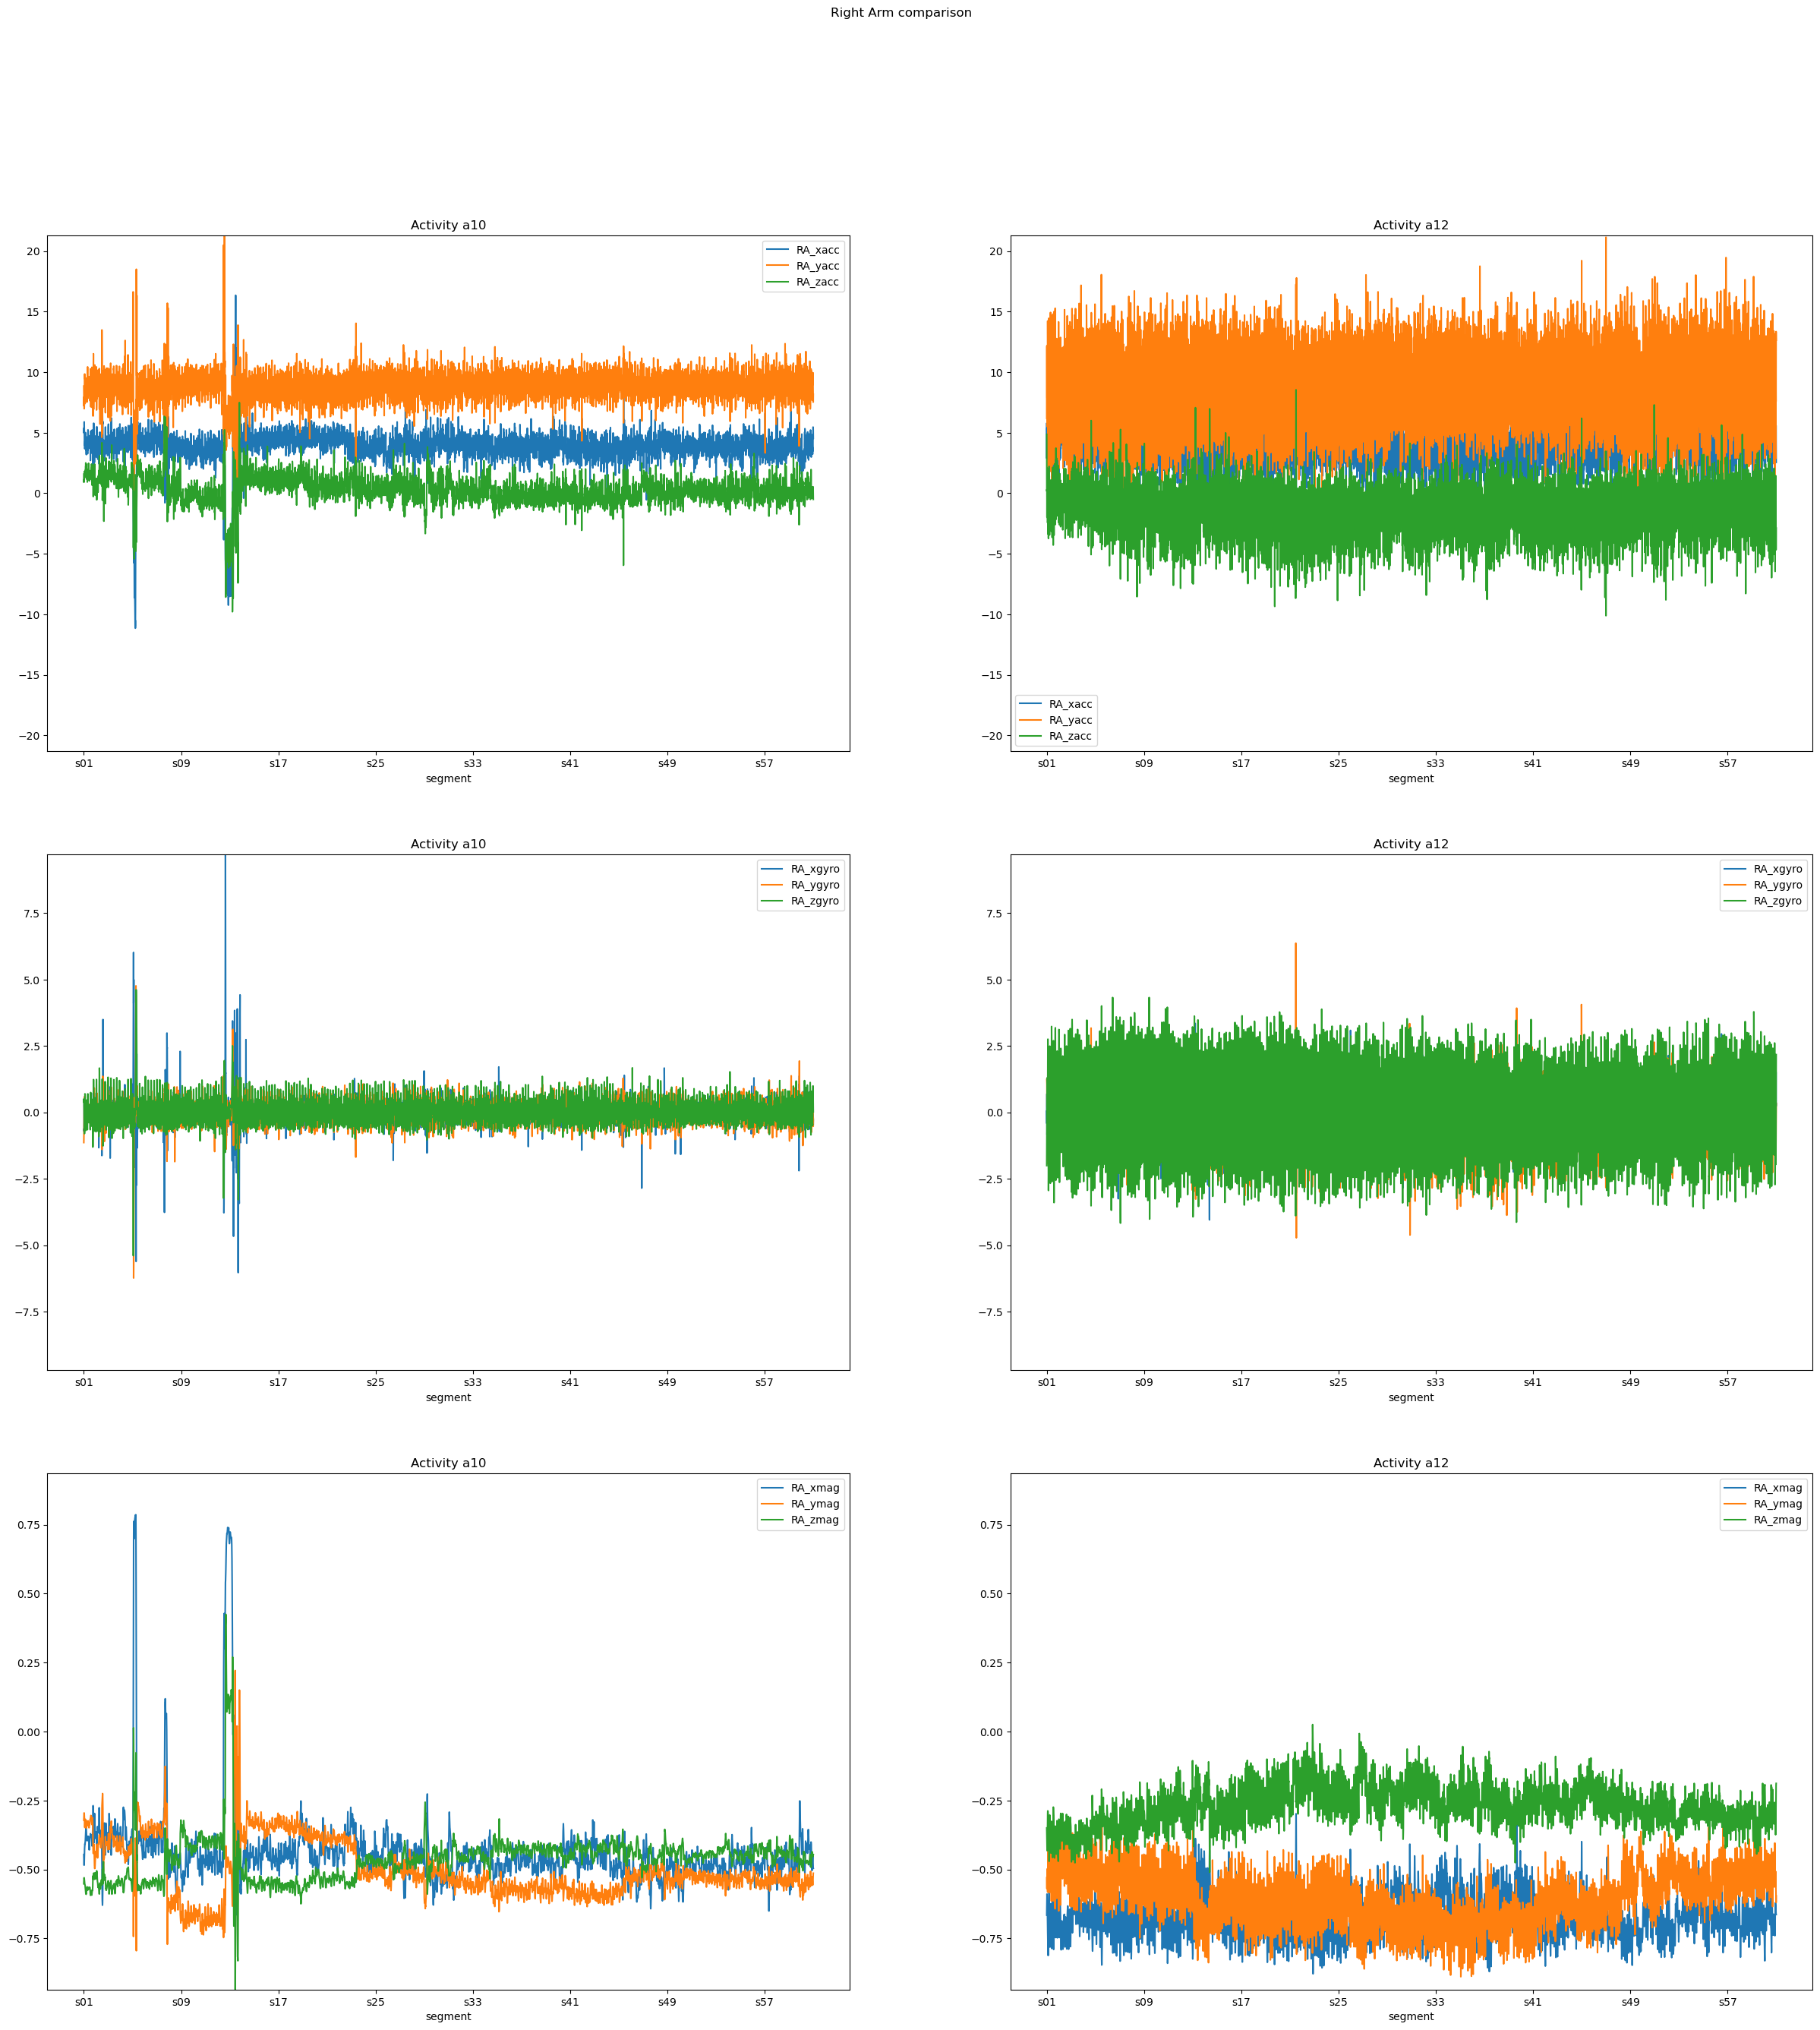

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(30, 30))
k = 3
for i in range(k,k+3):
    for j in range (2):
        df.query(f'activity == @target_activities[{j}]').plot(x='segment', y=columns[3*i:3*i+3], ax=axs[i-k,j])
        lim = df.iloc[:, 3*i:3*i+3].abs().values.max()
        axs[i-k,j].set_title(f'Activity {target_activities[j]}')
        axs[i-k,j].set_ylim([-lim,lim])

plt.suptitle('Right Arm comparison')
plt.show()

As for the Right Arm, again there's more variance on all three sensors for activity 12. However note that at some segments (around segment 8 and 13) the values for act 10 are quite high (that it's not found on the Left Arm case). So this might be a worthy case to take into account.

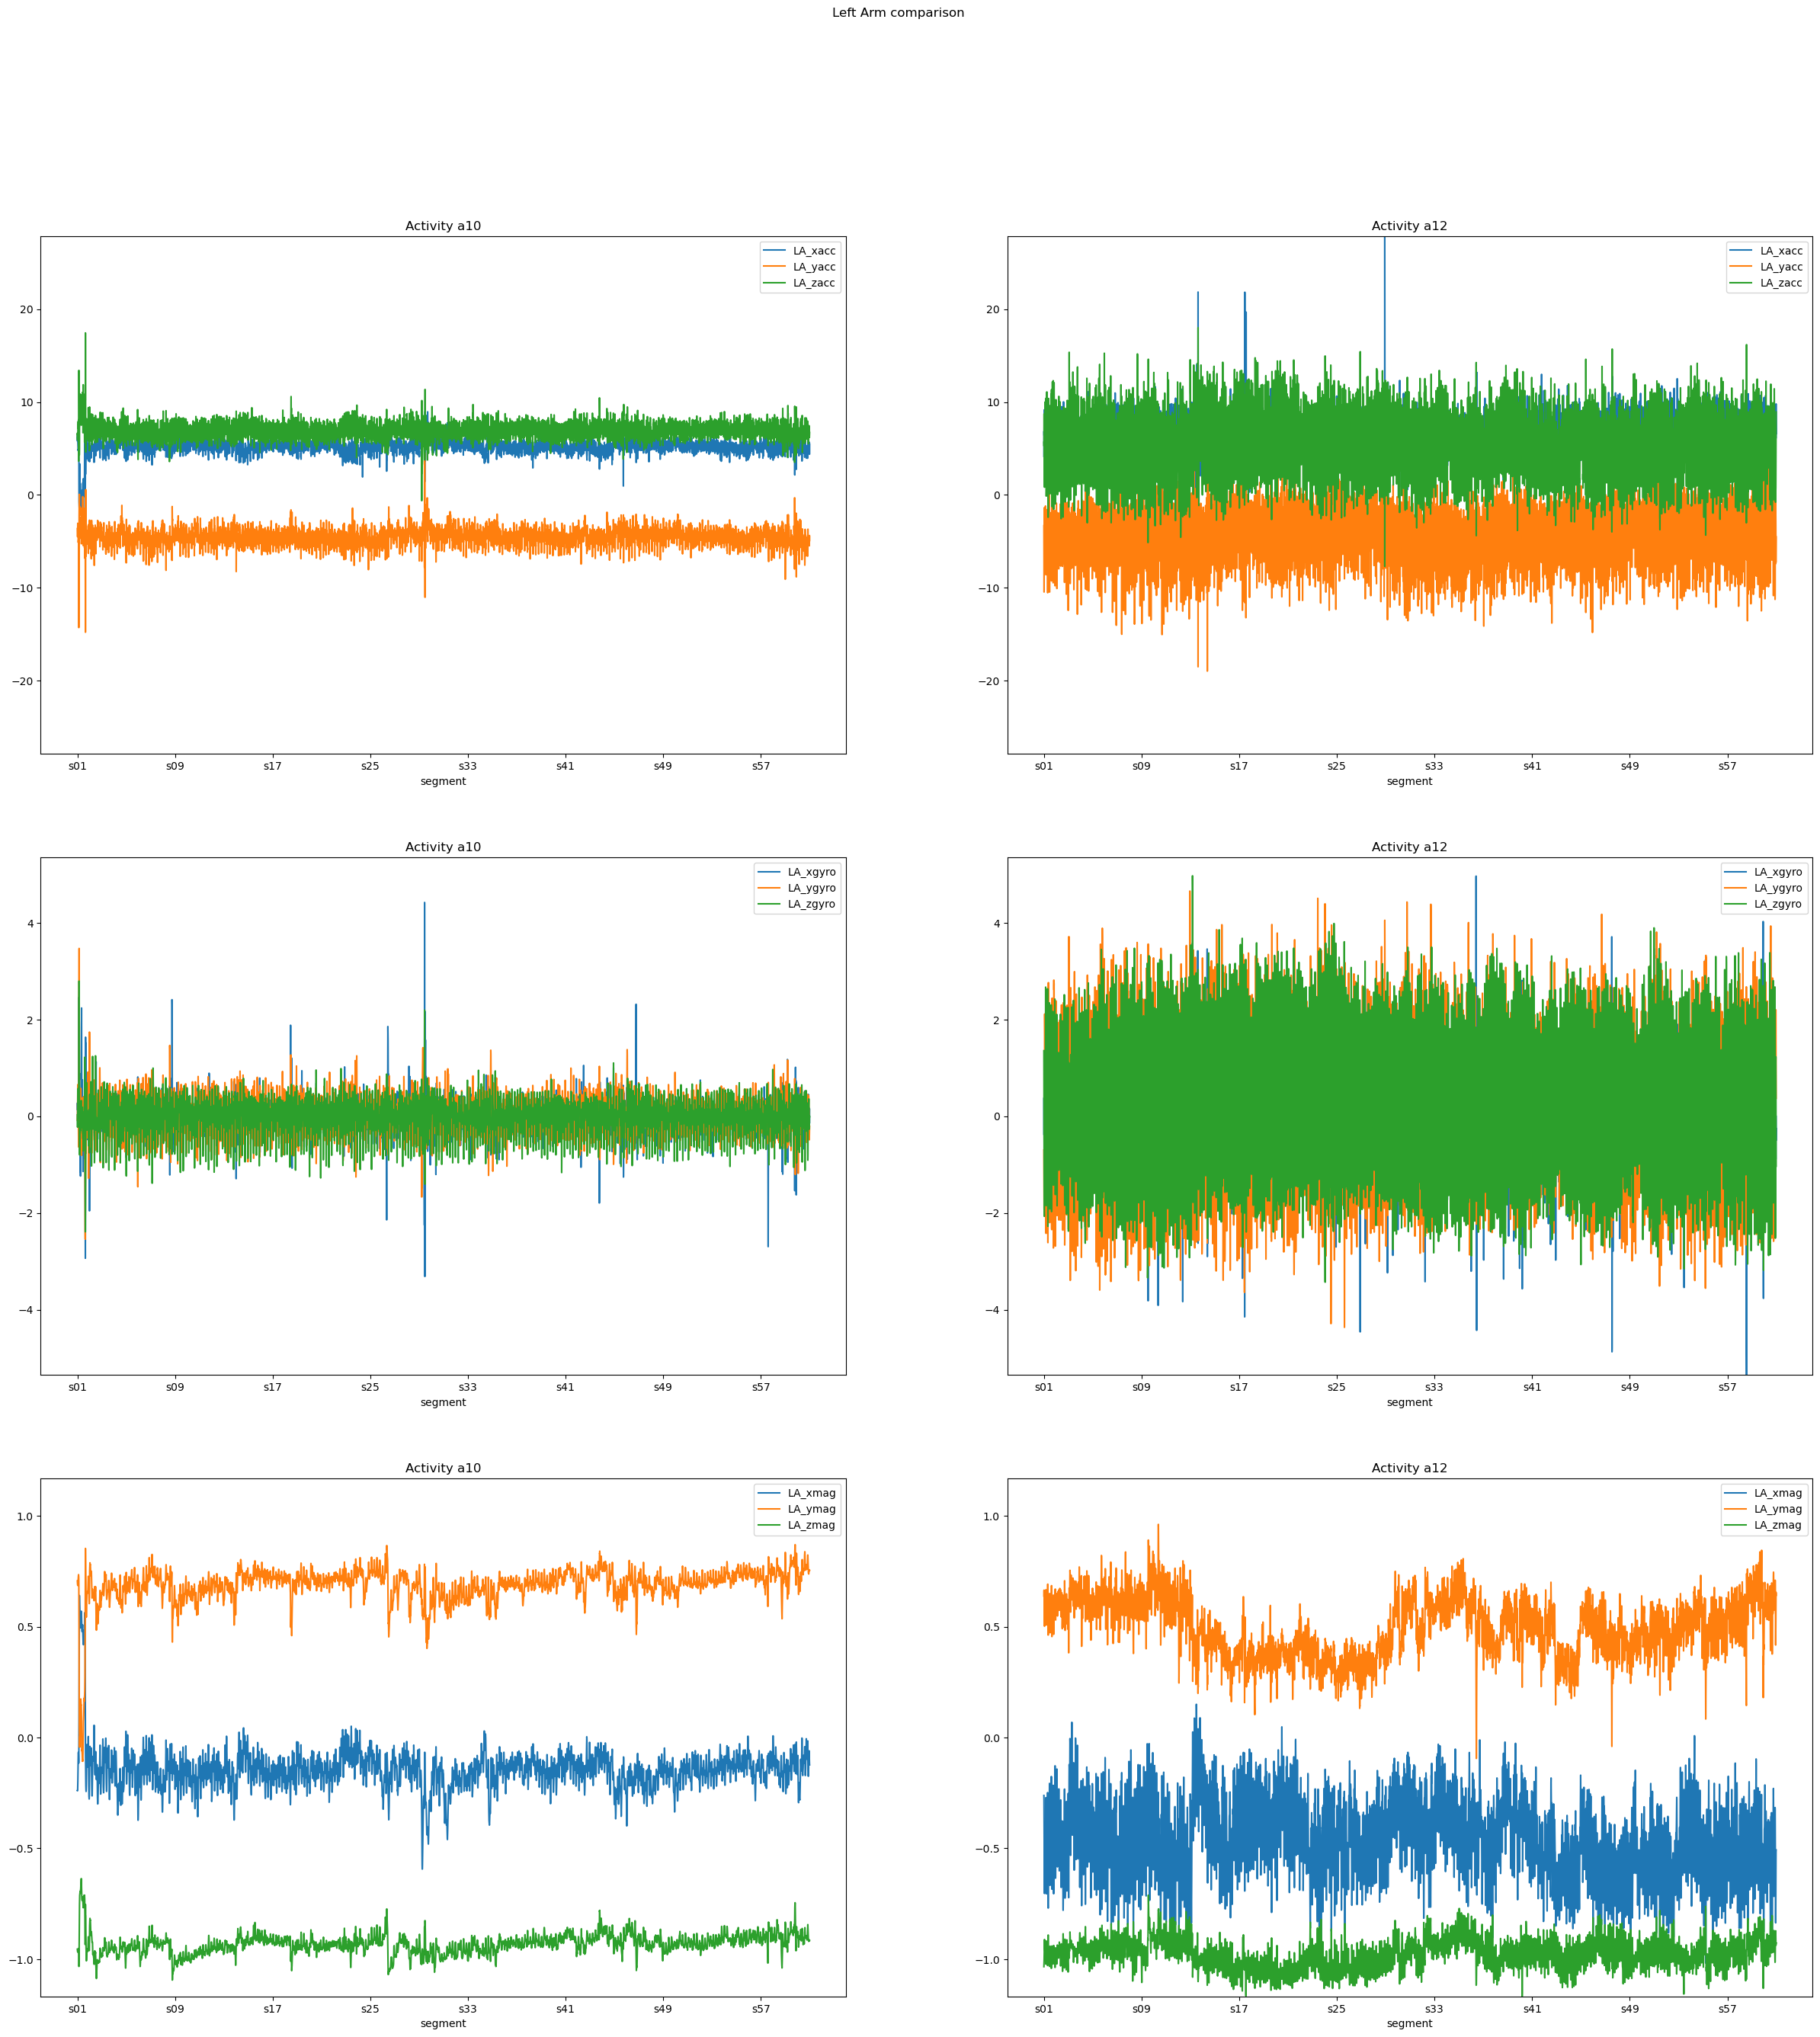

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(30, 30))
k = 6
for i in range(k,k+3):
    for j in range (2):
        df.query(f'activity == @target_activities[{j}]').plot(x='segment', y=columns[3*i:3*i+3], ax=axs[i-k,j])
        lim = df.iloc[:, 3*i:3*i+3].abs().values.max()
        axs[i-k,j].set_title(f'Activity {target_activities[j]}')
        axs[i-k,j].set_ylim([-lim,lim])

plt.suptitle('Left Arm comparison')
plt.show()

Again we see a high difference of variance for both activities, however the Left Arm Magnetometer seems to behave somehow similar.

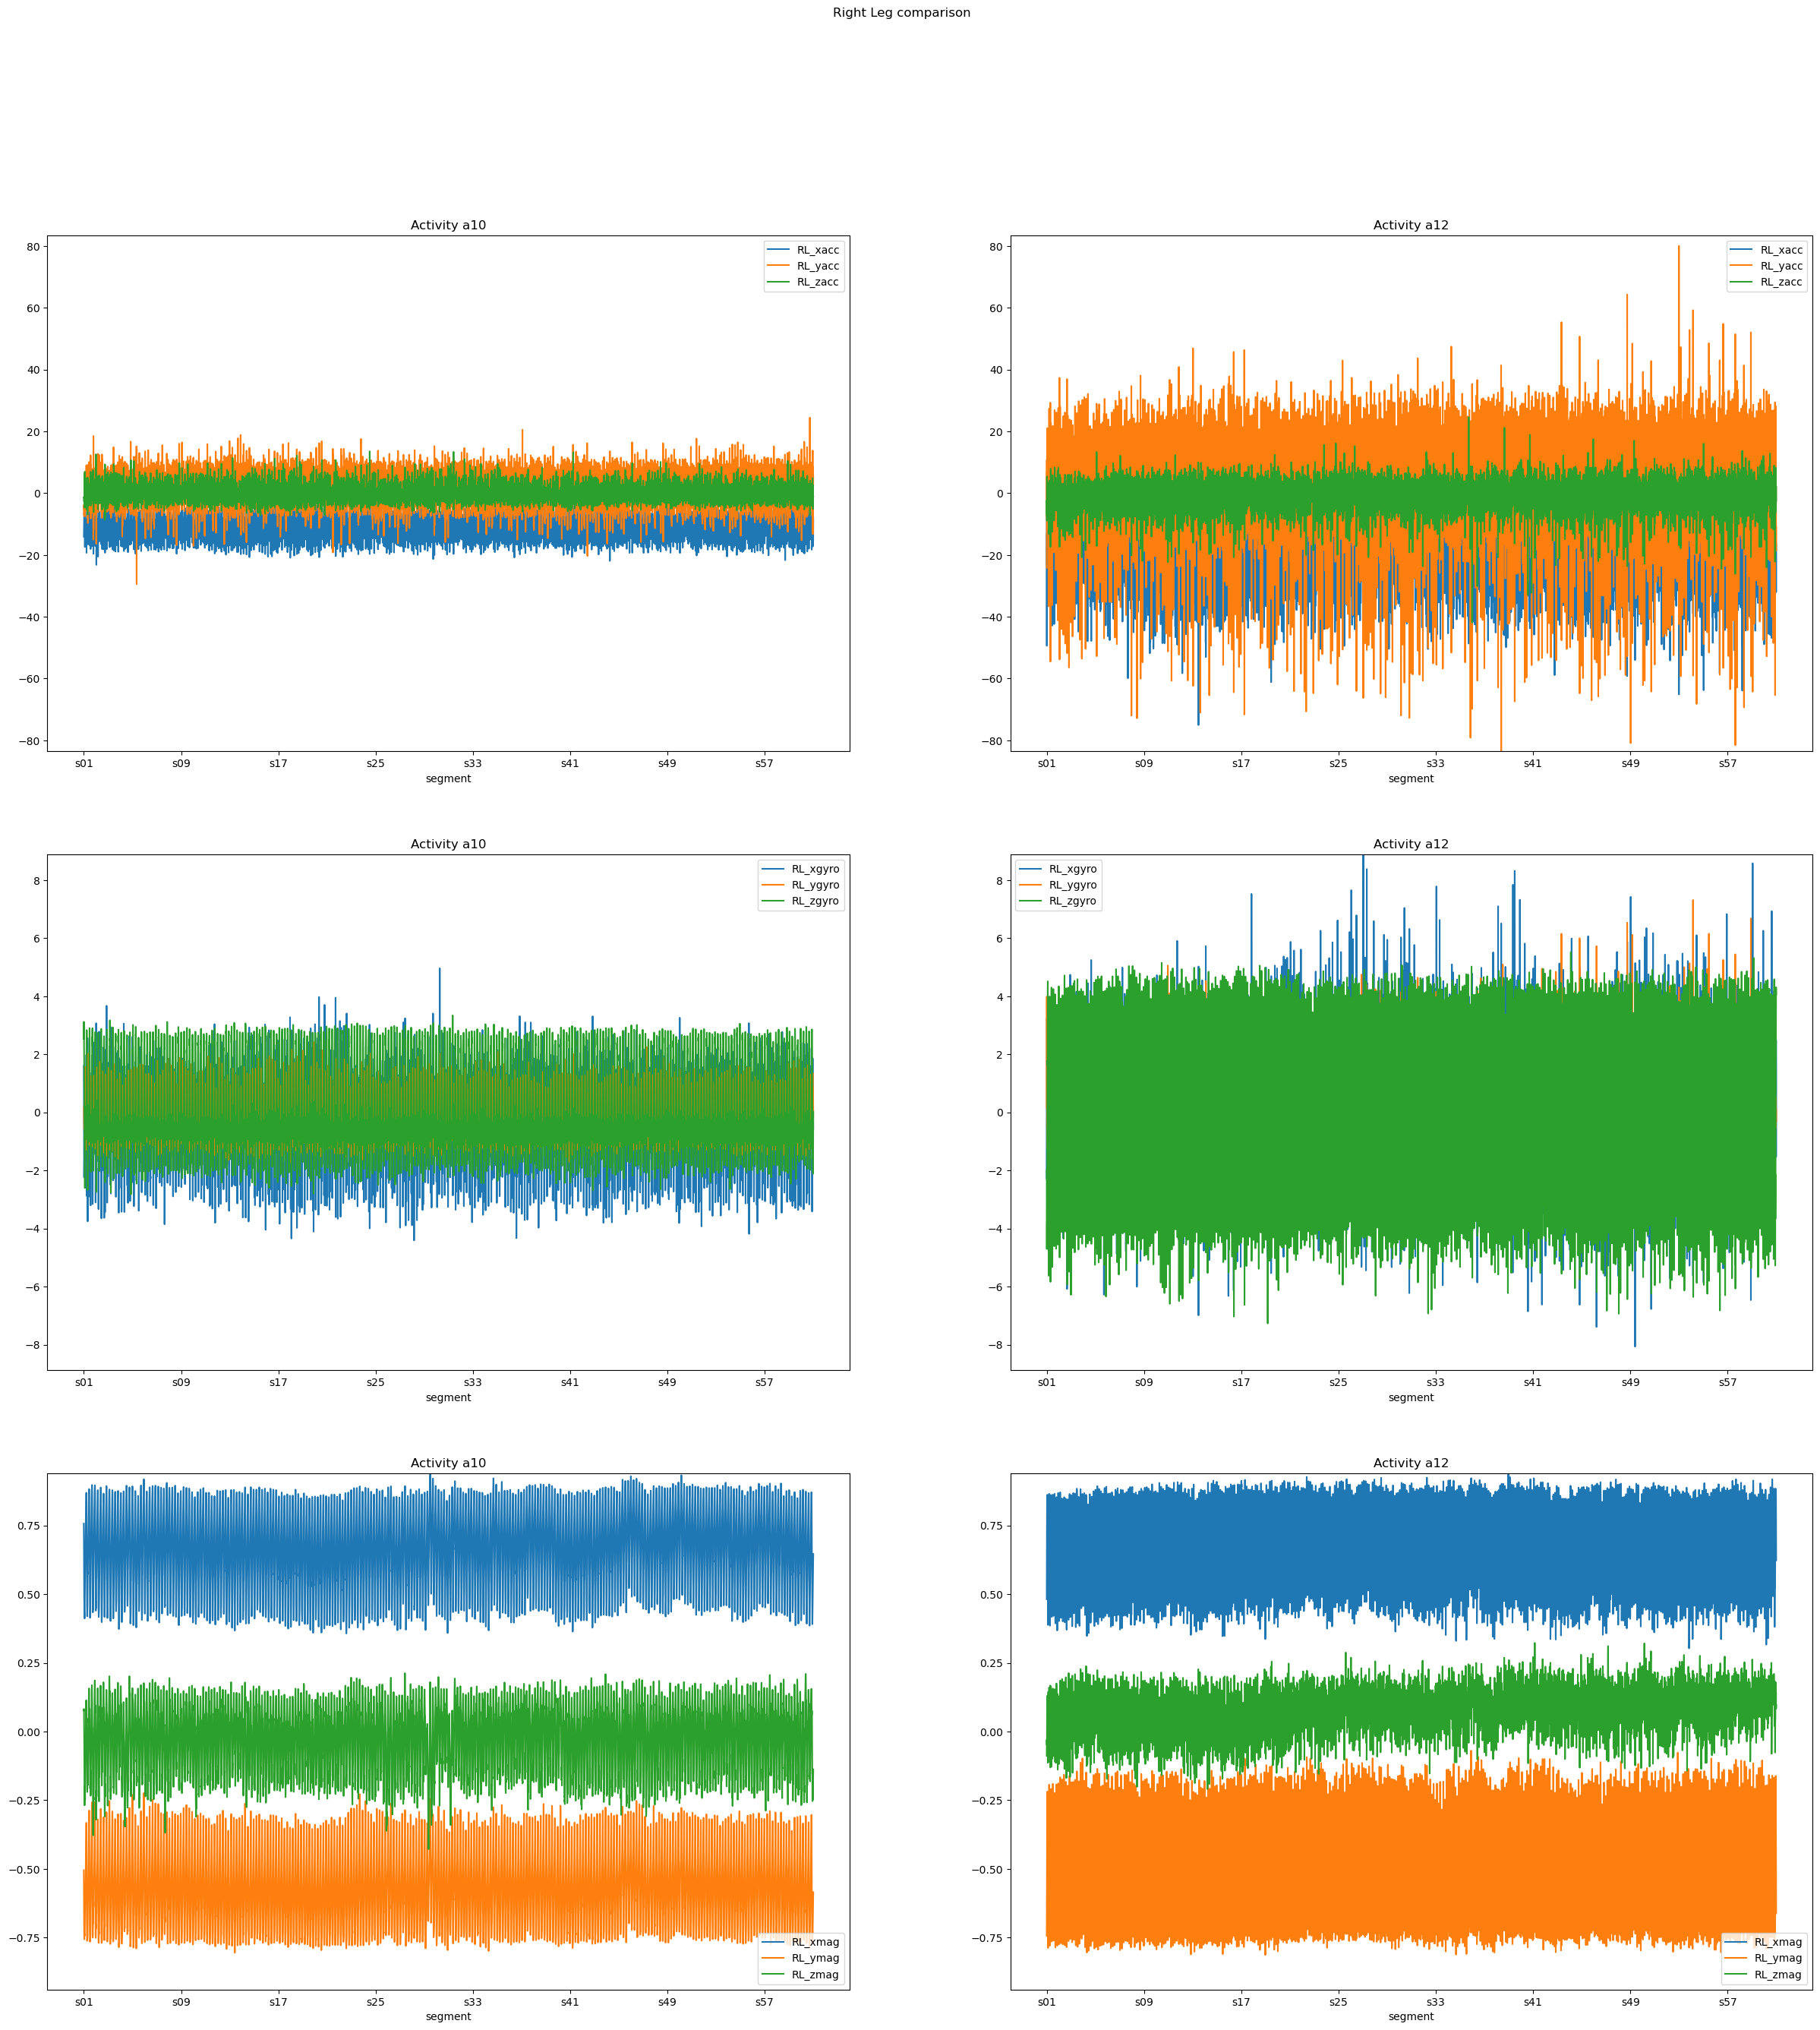

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(30, 30))
k = 9
for i in range(k,k+3):
    for j in range (2):
        df.query(f'activity == @target_activities[{j}]').plot(x='segment', y=columns[3*i:3*i+3], ax=axs[i-k,j])
        lim = df.iloc[:, 3*i:3*i+3].abs().values.max()
        axs[i-k,j].set_title(f'Activity {target_activities[j]}')
        axs[i-k,j].set_ylim([-lim,lim])

plt.suptitle('Right Leg comparison')
plt.show()

Here we can see a similar behaviour on the Magnetometer aswell.

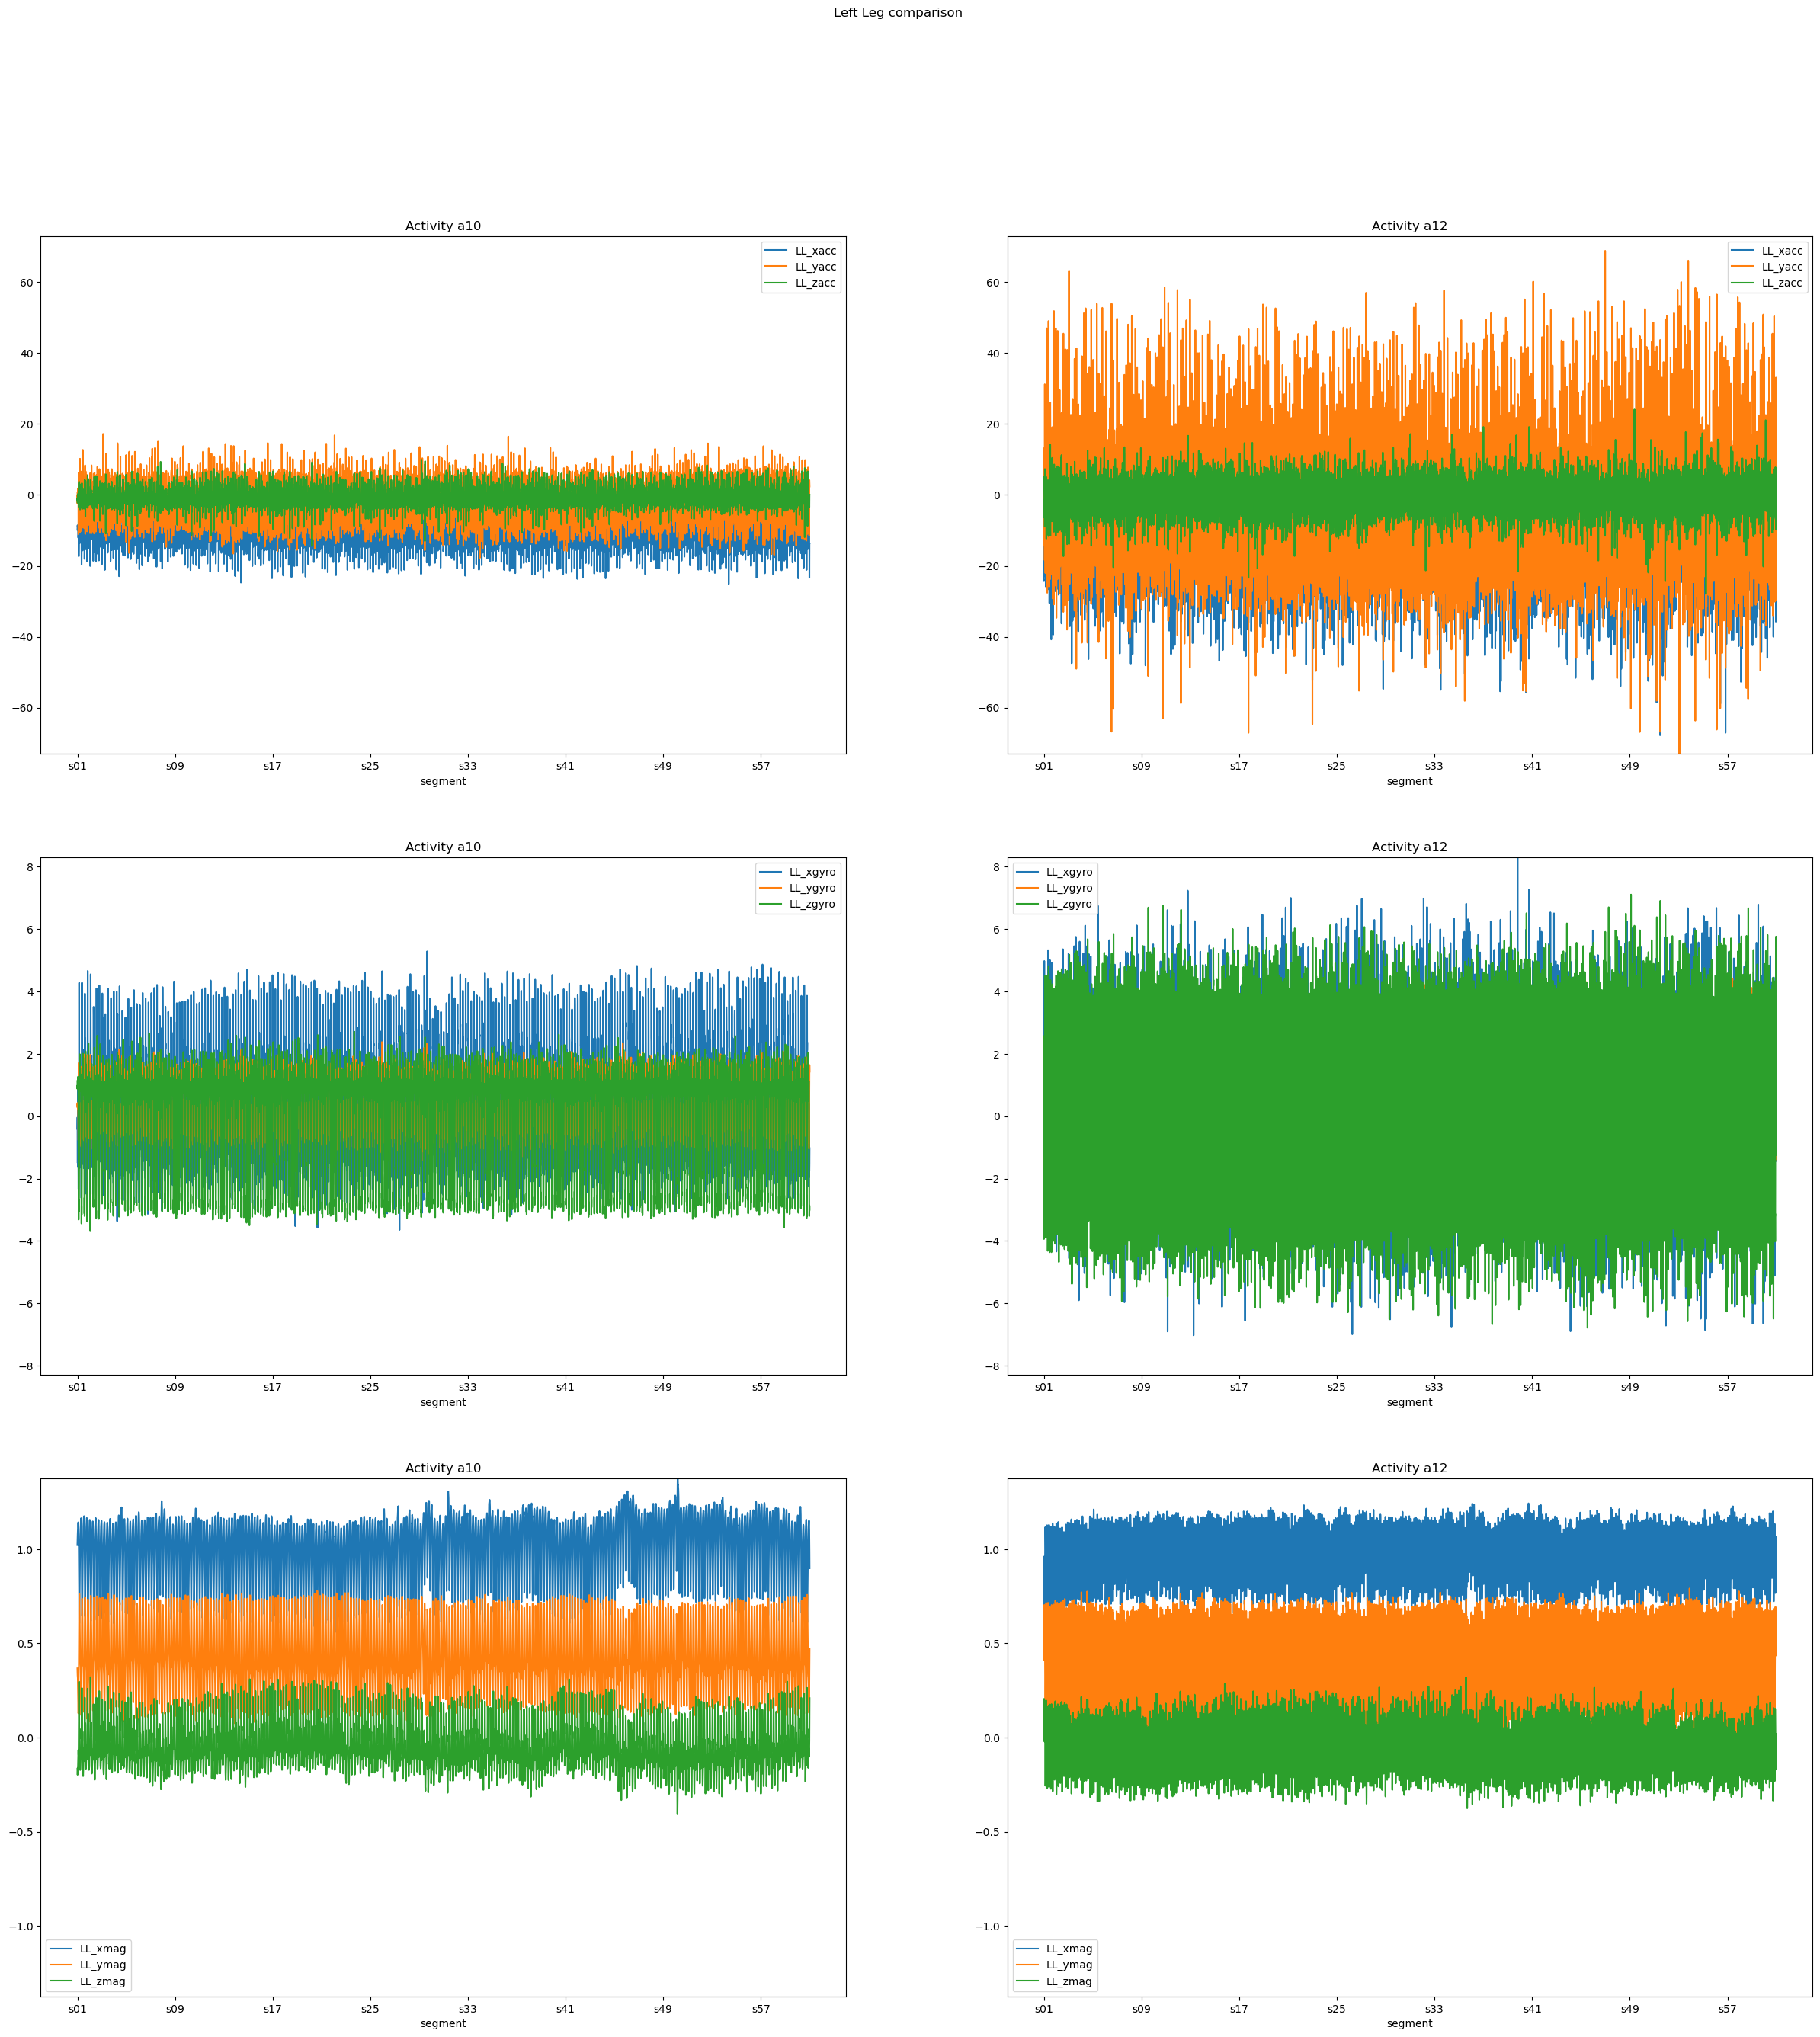

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(30, 30))
k = 12
for i in range(k,k+3):
    for j in range (2):
        df.query(f'activity == @target_activities[{j}]').plot(x='segment', y=columns[3*i:3*i+3], ax=axs[i-k,j])
        lim = df.iloc[:, 3*i:3*i+3].abs().values.max()
        axs[i-k,j].set_title(f'Activity {target_activities[j]}')
        axs[i-k,j].set_ylim([-lim,lim])

plt.suptitle('Left Leg comparison')
plt.show()

And yet again, similar variance for the Magnetometer.

## Exercise 2

Build a model (classifier) to predict the activity of a given subject. Decide on which features could be extracted from the data. For example:

- **mean, variance,skewness, and the kurtosis**. The distribution of each signal are approximately Normal. This means that we can take the first four statistical moments for each 5 second segment. By including the four moments, we are helping our models better learn the characteristic of each unique activity. 
- n first values of the  the  [**autocorrelation**](https://en.wikipedia.org/wiki/Autocorrelation) sequence. In some time series analyses, such as in [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average), it is desirable to minimize autocorrelation so as to transform the series into a [stationary state](https://en.wikipedia.org/wiki/Stationary_process). 
- n peaks of the [**discrete Fourier transform**](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)
of a segment with the corresponding frequencies.

Consider normalising all features between [0,1] and reduce the dimension of features using [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis).


We propose 2 approaches to create your train/testing set.

(1) Train and test sets that contain shuffled samples from each user. So the model will train on data from every user and predict the activities from every user in the test set.
(2) Seven user's data will be used as the training set and only one user's data as the test set. The goal here is to predict the activities of a user that the model has never seen before. How good is the model generalising the problem?

For each approach, consider the following building framework:
1. Split data into train and holdout sets
2. Optimize model hyperparameters
3. Cross Validate model's performance by analyze learning curves

Finally, consider the follwing evaluation metrics:

**Accuracy** represents how close or far off a given set of measurements are to their true value.

**Precision**: percentage of classifications predicted to be positive are actually positive. **Precision is a measure of the failure to correctly predict positive classifications. **

$$\textbf{Precision} = \frac{TP}{TP + FP}, $$

where TP refers to True Positives and FP to False Positives. 

**Recall** describes how well the model can identify points that belong to the positive class. **Recall is a measure of the failure in distinguishing between positive and negative classifications. **

$$\textbf{Recall} = \frac{TP}{TP + FN},$$

where FN corresponds to False Negatives.

Finally, the $f_{1} score$ is a weighted average of precision and recall. The  $f_{1} score$  is used to get a measure of both types of failures.

**Note: Make comments on the code to discuss the results.**
 

## 2.1. Feature Extraction

In [11]:
from scipy.stats import  skew, kurtosis

In [12]:
# We only perform the suggested data augmentation on the statisticals values.
stats_columns = [f'{sensor}_{stat}' for sensor in columns for stat in ['mean', 'var', 'skew', 'kurtosis']]

dfs = [read_data(activity, subject, segment)
       for activity in activities
       for subject in subjects
       for segment in segments]

# We again concatenate the DataFrames, group and aggregate with the 4 suggested functions.
df2 = pd.concat(dfs).groupby(['activity', 'subject', 'segment']).agg(['mean', 'var', skew, kurtosis]).reset_index()
df2.columns = ['activity', 'subject', 'segment'] + stats_columns

# Takes ~2 min to run this cell

In [13]:
df2

,activity,subject,segment,T_xacc_mean,T_xacc_var,T_xacc_skew,T_xacc_kurtosis,T_yacc_mean,T_yacc_var,T_yacc_skew,...,LL_xmag_skew,LL_xmag_kurtosis,LL_ymag_mean,LL_ymag_var,LL_ymag_skew,LL_ymag_kurtosis,LL_zmag_mean,LL_zmag_var,LL_zmag_skew,LL_zmag_kurtosis
0,a01,p1,s01,7.975714,0.014395,-0.023319,-1.019095,1.083150,0.002208,0.082260,...,0.170796,0.248323,0.301314,6.267229e-07,0.177075,-0.299003,-0.057119,6.778722e-07,0.036729,-0.099989
1,a01,p1,s02,7.978250,0.007551,0.552416,-0.927828,1.140865,0.000784,-0.183415,...,0.268779,-0.122877,0.301896,7.403458e-07,-0.286918,0.149063,-0.057268,7.032302e-07,0.347471,0.163469
2,a01,p1,s03,7.970894,0.003092,0.100538,-0.917229,1.140962,0.000508,0.458858,...,0.127283,-0.121647,0.302462,5.802523e-07,-0.134430,-0.402729,-0.057068,6.268222e-07,0.045579,-0.024409
3,a01,p1,s04,7.938412,0.003763,-0.231914,2.193103,1.165260,0.002173,0.218451,...,-0.135379,0.417872,0.302388,5.398837e-07,0.021485,-0.315443,-0.056422,8.011245e-07,0.240690,-0.090456
4,a01,p1,s05,7.908930,0.001741,2.042285,6.944206,1.187504,0.000662,-0.222607,...,-0.188147,-0.115299,0.302977,6.787533e-07,-0.148229,0.121351,-0.055801,6.853423e-07,0.258429,0.024906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,a19,p8,s56,8.280854,28.080803,1.350075,4.652970,-1.491537,14.670334,-0.065489,...,0.452400,-1.034397,0.522945,4.033226e-02,-0.040701,-1.258815,0.297666,4.135451e-02,-0.310022,-0.485352
9116,a19,p8,s57,9.591118,35.722025,2.981144,19.211653,0.086304,5.329897,-0.713019,...,-0.590919,-0.298990,0.498228,2.212497e-02,-0.266377,-1.024018,0.224716,3.355704e-02,-0.736410,0.331687
9117,a19,p8,s58,9.599113,48.850886,0.449237,-0.715365,-0.728367,5.683022,-0.592675,...,-0.612352,0.152592,0.145656,9.656444e-02,-0.009505,-1.006077,-0.237786,2.026107e-02,0.668438,-0.356406
9118,a19,p8,s59,9.692482,59.378336,4.491114,34.607587,-0.582724,4.162963,-0.902483,...,-0.045800,-0.697275,0.157381,2.448990e-02,0.050624,0.034480,0.533023,1.356379e-02,-1.482489,3.279057


## 2.2. Model training

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def train(X_train, X_test, y_train, y_test, pca=False, verbose=True):
    ''' Takes X_train, X_test, y_train, y_test to train a variety of classifiers, 
        also performs a PCA if pca=True.
    '''
    # Perform PCA if needed
    if pca:
        # Standarize the values
        scaler = StandardScaler()
        X_train_std = scaler.fit_transform(X_train)
        X_test_std = scaler.transform(X_test)

        # Perform PCA
        pca = PCA(n_components=0.8)
        X_train_pca = pca.fit_transform(X_train_std)
        X_test_pca = pca.transform(X_test_std)

    # Inicialization of the classifiers
    RF_clf = RandomForestClassifier()
    KNN_clf = KNeighborsClassifier()
    SV_clf = SVC()
    NB_clf = GaussianNB()
    XGB_clf = XGBClassifier()
    classifiers = [RF_clf, KNN_clf, SV_clf, NB_clf, XGB_clf]

    # We want to save the f1_scores for later comparison
    f1_scores = []

    for clf in classifiers:
        if pca:
            clf.fit(X_train_pca, y_train)
            preds = clf.predict(X_test_pca)
        else: 
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)
        
        # Suggested metrics
        acc = accuracy_score(y_test, preds)
        prec = precision_score(y_test, preds, average='macro')
        rec = recall_score(y_test, preds, average='macro')
        f1 = f1_score(y_test, preds, average='macro')
        f1_scores.append(f1)

        if verbose:
            print(f"Metrics for {type(clf).__name__}:")
            print(f"Accuracy: {acc:.4f}")
            print(f"Precision: {prec:.4f}")
            print(f"Recall: {rec:.4f}")
            print(f"F1 score: {f1:.4f}\n")
    return f1_scores

The first approach is by mixing the data from all 8 subjects and utilizing the variety of classifiers defined above.

In [15]:
X = df2.iloc[:,3:].values
y = df2.iloc[:,0]
y = pd.factorize(y)[0]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(9120, 180) (9120,)


In [16]:
f1_scores = train(X_train, X_test, y_train, y_test)

Metrics for RandomForestClassifier:
Accuracy: 0.9896
Precision: 0.9907
Recall: 0.9904
F1 score: 0.9902

Metrics for KNeighborsClassifier:
Accuracy: 0.9282
Precision: 0.9323
Recall: 0.9313
F1 score: 0.9268

Metrics for SVC:
Accuracy: 0.8969
Precision: 0.9086
Recall: 0.9024
F1 score: 0.8992

Metrics for GaussianNB:
Accuracy: 0.9496
Precision: 0.9519
Recall: 0.9510
F1 score: 0.9503

Metrics for XGBClassifier:
Accuracy: 0.9929
Precision: 0.9935
Recall: 0.9935
F1 score: 0.9933



The following code performs a hyperparameter search as suggested, we leave it here in case we want to tune hyperparameters at the end. It is however, a bit skeptical and time consuming when it comes to comparison. (Takes some hours to execute too)

Output of the code above for Hyperparameter searching.

Best parameters for RandomForestClassifier:
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9661654135338346


Best parameters for KNeighborsClassifier:
{'n_neighbors': 3, 'weights': 'distance'}
Best score: 0.8662907268170427


Best parameters for SVC:
{'kernel': 'linear', 'gamma': 'auto', 'C': 10}
Best score: 0.9220551378446116


Best parameters for GaussianNB:
{'var_smoothing': 1e-09}
Best score: 0.906140350877193


Best parameters for XGBClassifier:
{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 300}
Best score: 0.9315789473684208

Here we train with the same data but with a prior PCA.

In [17]:
pca_f1_scores = train(X_train, X_test, y_train, y_test, pca=True)

Metrics for RandomForestClassifier:
Accuracy: 0.9594
Precision: 0.9612
Recall: 0.9612
F1 score: 0.9605

Metrics for KNeighborsClassifier:
Accuracy: 0.9463
Precision: 0.9499
Recall: 0.9498
F1 score: 0.9434

Metrics for SVC:
Accuracy: 0.9666
Precision: 0.9689
Recall: 0.9674
F1 score: 0.9679

Metrics for GaussianNB:
Accuracy: 0.8816
Precision: 0.8907
Recall: 0.8831
F1 score: 0.8836

Metrics for XGBClassifier:
Accuracy: 0.9583
Precision: 0.9605
Recall: 0.9599
F1 score: 0.9601



And we plot the comparison for the F1 scores

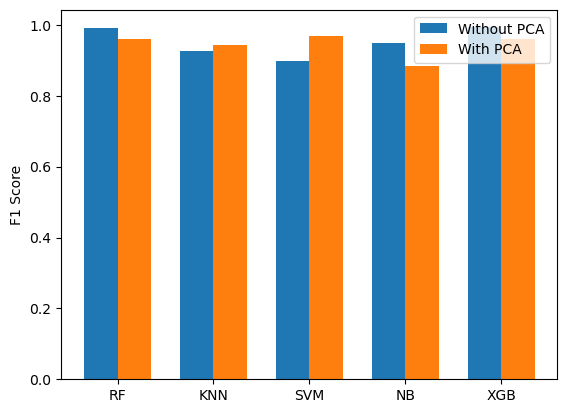

In [18]:
labels = ['RF', 'KNN', 'SVM', 'NB', 'XGB']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, f1_scores, width, label='Without PCA')
rects2 = ax.bar(x + width/2, pca_f1_scores, width, label='With PCA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

We can see that in some cases, perfoming a PCA does help with the classifier but it's quite skeptical since a lot of variables (like the hyperparameter's, dataset, the classifier itself) can interfere with the overall procedure and results.

For this matter, we will leave out one subject as the test set, which is the second suggested approach.

In [19]:
target_subject = 'p1'

df2_train = df2.query(f"subject!=@target_subject")
df2_test = df2.query(f"subject==@target_subject")

X_train = df2_train.iloc[:, 3:].values
X_test = df2_test.iloc[:, 3:].values

y_train = df2_train.iloc[:, 0]
y_test = df2_test.iloc[:, 0]

y_train = pd.factorize(y_train)[0]
y_test = pd.factorize(y_test)[0]

print(df2_train.shape, df2_test.shape)

(7980, 183) (1140, 183)


Without PCA.

In [20]:
f1_scores_2 = train(X_train, X_test, y_train, y_test)

Metrics for RandomForestClassifier:
Accuracy: 0.9096
Precision: 0.8880
Recall: 0.9096
F1 score: 0.8959

Metrics for KNeighborsClassifier:
Accuracy: 0.8553
Precision: 0.8658
Recall: 0.8553
F1 score: 0.8447

Metrics for SVC:
Accuracy: 0.8886
Precision: 0.9092
Recall: 0.8886
F1 score: 0.8805

Metrics for GaussianNB:
Accuracy: 0.8982
Precision: 0.9209
Recall: 0.8982
F1 score: 0.8962

Metrics for XGBClassifier:
Accuracy: 0.8579
Precision: 0.8430
Recall: 0.8579
F1 score: 0.8407



We want to compare the mixing subjects and Leave One Out methods.

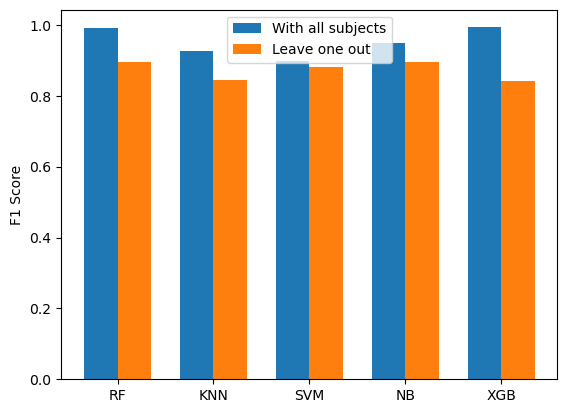

In [21]:
labels = ['RF', 'KNN', 'SVM', 'NB', 'XGB']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, f1_scores, width, label='With all subjects')
rects2 = ax.bar(x + width/2, f1_scores_2, width, label='Leave one out')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

We can see that Leave One Out decreased the performance of the classifiers but overall it is still pretty good since it can predict 80-90% of a subject that the model has not seen before.

We want to see if performing a PCA helps the performance

In [22]:
pca_f1_scores_2 = train(X_train, X_test, y_train, y_test, pca=True)

Metrics for RandomForestClassifier:
Accuracy: 0.8737
Precision: 0.8802
Recall: 0.8737
F1 score: 0.8724

Metrics for KNeighborsClassifier:
Accuracy: 0.8939
Precision: 0.8978
Recall: 0.8939
F1 score: 0.8913

Metrics for SVC:
Accuracy: 0.8518
Precision: 0.8573
Recall: 0.8518
F1 score: 0.8390

Metrics for GaussianNB:
Accuracy: 0.8105
Precision: 0.8526
Recall: 0.8105
F1 score: 0.8076

Metrics for XGBClassifier:
Accuracy: 0.8430
Precision: 0.8728
Recall: 0.8430
F1 score: 0.8455



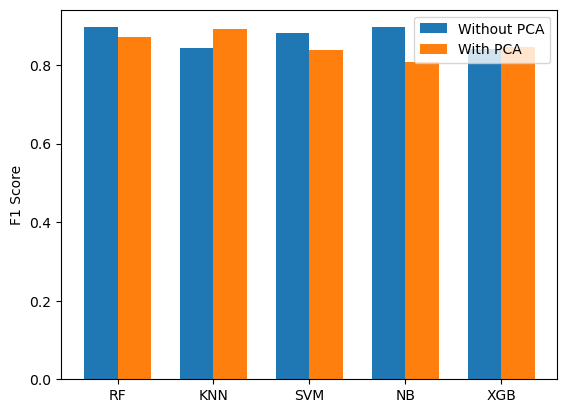

In [23]:
labels = ['RF', 'KNN', 'SVM', 'NB', 'XGB']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, f1_scores_2, width, label='Without PCA')
rects2 = ax.bar(x + width/2, pca_f1_scores_2, width, label='With PCA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

As we can see on the previous graph, performing a PCA does help with some classifiers.